In [ ]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

# MAT281

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m04_data_science/master?filepath=04_clasificacion/04_clasificacion.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m04_data_science/blob/master//04_clasificacion/04_clasificacion.ipynb)

## ¿Qué contenido aprenderemos?
* Clasificación
* Regresión Logística

## Motivación
* La __clasificación__ es un problema muy común puesto que permite la toma de decisiones. 
- __Regresión logística__ es un algoritmo que surge naturalmente como extensión de regresión lineal pero en el contexto de clasificación.

## Clasficación
### Wine Dataset
<img src="images/wine.jpg" alt="" width="600px" align="middle"/>

## Clasficación
### Wine Dataset

Los datos corresponden a 3 cultivos diferentes de vinos de la misma región de Italia, y que han sido identificados con las etiquetas 1, 2 y 3. Para cada tipo de vino se realizado 13 análisis químicos:

1. Alcohol 
2.  Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 


La base de datos contiene 178 muestras distintas en total.

# Wine dataset

Conocemos los valores y las etiquetas, y se desea obtener la etiqueta de una muestra sin etiquetar, por lo que el problema es de __clasificación__:
* Tenemos $ X \in R^{n \times m} \textrm{ y } Y \in N^m $  y buscamos las etiquetas de $ x \in R^n$.
* ¿A qué grupo pertenece este nuevo dato?

## Regresión Lineal
Se buscaba entrenar una función lineal
$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$$ de
forma que se minimice
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$


## Regresión Logística
Buscaremos entrenar una función
logística
$$h_{\theta}(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + ... + \theta_n x_n)}}$$

de forma que se minimice

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$


## Ejemplo 2D
¿Conocen el accidente del Space Shuttle Challeger?

28 Junio 1986. A pesar de existir evidencia de funcionamiento defectuoso, se da luz verde al lanzamiento.

<img src="images/Challenger1.gif" alt="" width="600px" align="middle"/>

## Ejemplo 2D

A los 73 segundos de vuelo, el transbordador espacial explota, matando a los 7 pasajeros.

<img src="images/Challenger2.jpg" alt="" width="600px" align="middle"/>

## Ejemplo 2D
Como parte del debriefing del accidente, se obtuvieron los siguientes datos

In [1]:
%%bash
cat data/Challenger.txt

"Temp"	"BadRings"
53	3
56	1
57	1
63	0
66	0
67	0
67	0
67	0
68	0
69	0
70	0
70	1
70	1
70	1
72	0
73	0
75	0
75	2
76	0
76	0
78	0
79	0
80	0
81	0


## Ejemplo 2D
Grafiquemos los datos

In [48]:
import numpy as np
import pandas as pd
import altair as alt
challenger = pd.DataFrame(np.loadtxt("data/Challenger.txt", skiprows=1).astype(int), columns=["temp_f", "nm_bad_rings"])
challenger.head()

,temp_f,nm_bad_rings
0,53,3
1,56,1
2,57,1
3,63,0
4,66,0


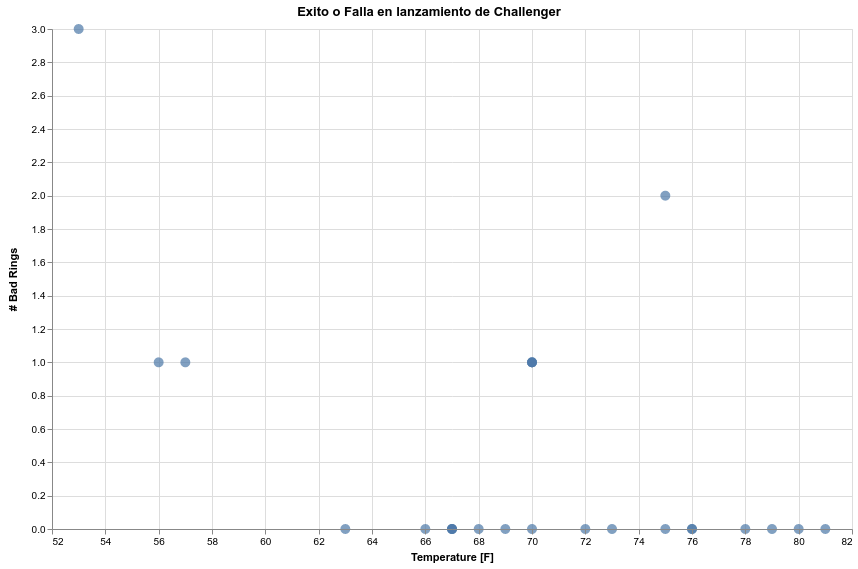

In [50]:
alt.Chart(challenger).mark_circle(size=100).encode(
    x=alt.X("temp_f", scale=alt.Scale(zero=False), title="Temperature [F]"),
    y=alt.Y("nm_bad_rings", title="# Bad Rings")
).properties(
    title="Exito o Falla en lanzamiento de Challenger",
    width=800,
    height=500
)

## Ejemplo 2D
Nos gustaría saber en qué condiciones se produce accidente. No nos importa el número de fallas, sólo si existe falla o no.

In [84]:
challenger = challenger.assign(temp_c=lambda x: ((x["temp_f"] - 32.) / 1.8).round(2),
                               is_failure=lambda x: x["nm_bad_rings"].apply(lambda y: 1 if y==0 else 0),
                               ds_failure=lambda x: x["is_failure"].apply(lambda y: "Falla" if y==0 else "Éxito")
                              )

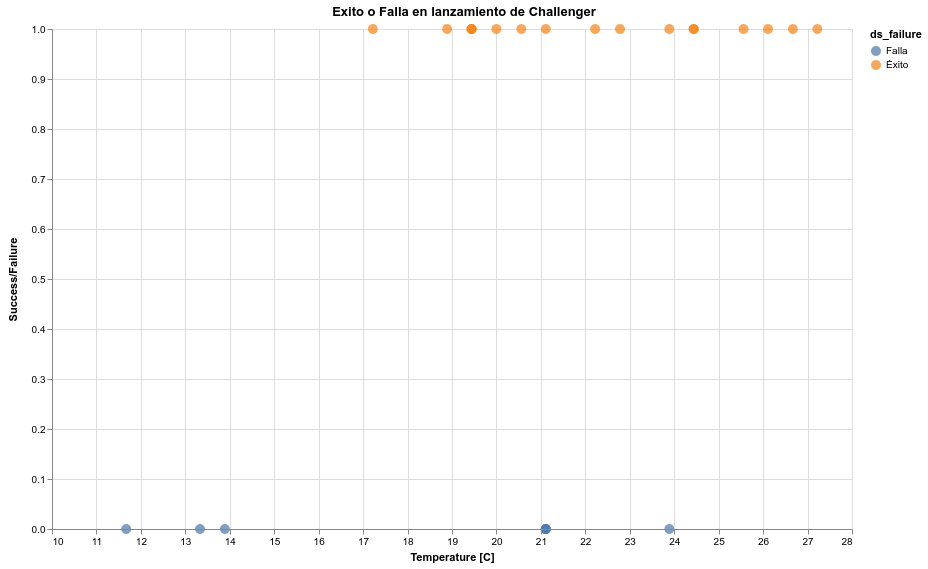

In [87]:
alt.Chart(challenger).mark_circle(size=100).encode(
    x=alt.X("temp_c", scale=alt.Scale(zero=False), title="Temperature [C]"),
    y=alt.Y("is_failure:Q", title="Success/Failure"),
    color="ds_failure:N"
).properties(
    title="Exito o Falla en lanzamiento de Challenger",
    width=800,
    height=500
)

## Modelo

Definimos como
antes

$$\begin{aligned}
Y &= \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}\end{aligned}$$

y

$$\begin{aligned}
X = 
\begin{bmatrix} 
1 & x^{(1)}_1 & \dots & x^{(1)}_n \\ 
1 & x^{(2)}_1 & \dots & x^{(2)}_n \\
\vdots & \vdots & & \vdots \\
1 & x^{(m)}_1 & \dots & x^{(m)}_n \\
\end{bmatrix}\end{aligned}$$


## Modelo

Luego la
evaluación de todos los datos puede escribirse matricialmente como

$$\begin{aligned}
X \theta &= 
\begin{bmatrix}
1 & x_1^{(1)} & ... & x_n^{(1)} \\
\vdots & \vdots & & \vdots \\
1 & x_1^{(m)} & ... & x_n^{(m)} \\
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_n\end{bmatrix} \\
& = 
\begin{bmatrix}
1 \theta_0 + x^{(1)}_1 \theta_1 + ... + x^{(1)}_n \theta_n \\
\vdots \\
1 \theta_0 + x^{(m)}_1 \theta_1 + ... + x^{(m)}_n \theta_n \\
\end{bmatrix}\end{aligned}$$


## Modelo

Nuestro problema
es encontrar un “buen” conjunto de valores $\theta$ 
de modo que

$$\begin{aligned}
g(X\theta)
\approx
Y\end{aligned}$$

donde $g(z)$ es la función sigmoide (en. sigmoid function).
$$g(z) = \frac{1}{1+e^{-z}}$$


## Interpretación gráfica

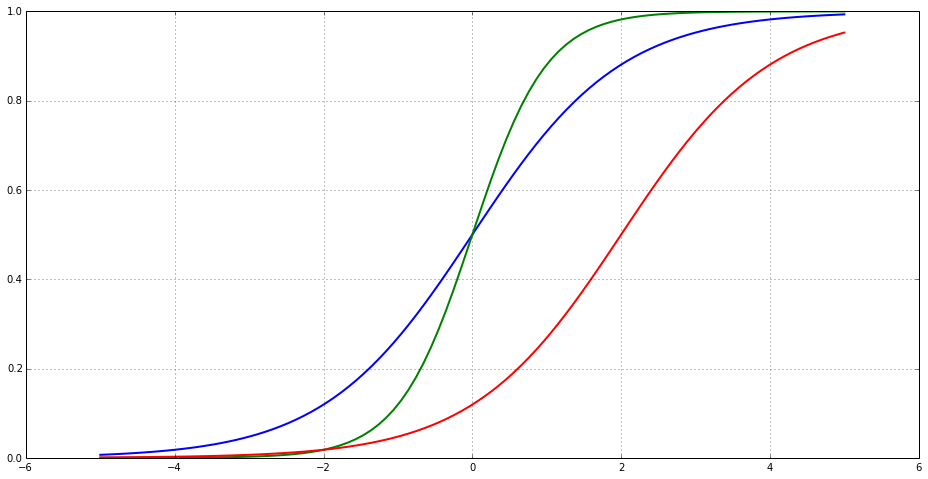

In [10]:
from matplotlib import pyplot as plt
import numpy as np

def sigmoid(z):
    return (1+np.exp(-z))**(-1.)

z = np.linspace(-5,5,100)
g = sigmoid(z)
fig = plt.figure(figsize=(16,8))
plt.plot(z,sigmoid(z), lw=2.0)
plt.plot(z,sigmoid(z*2), lw=2.0)
plt.plot(z,sigmoid(z-2), lw=2.0)
plt.grid("on")
plt.show()

#### Modelo
## Función Sigmoide

La función
sigmoide $g(z) = (1+e^{-z})^{-1}$ tiene la siguiente propiedad:
$$g'(z) =  g(z)(1-g(z))$$

#### Modelo
## Función Sigmoide

$g(z) = (1+e^{-z})^{-1}$ y $g'(z) =  g(z)(1-g(z))$.

Demostración:

$$\begin{aligned}
g'(z) &= \frac{-1}{(1+e^{-z})^2} (-e^{-z}) \\
      &= \frac{e^{-z}}{(1+e^{-z})^2} \\
      &= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} \\
      &= \frac{1}{1+e^{-z}} \left(1 - \frac{1}{1+e^{-z}} \right) \\
      &= g(z)(1-g(z))\end{aligned}$$

## Interpretación gráfica

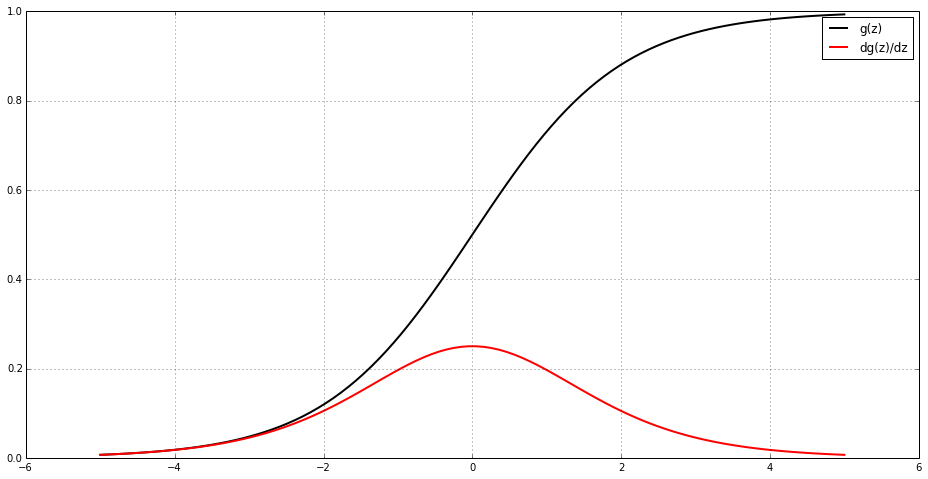

In [11]:
from matplotlib import pyplot as plt
import numpy as np

def sigmoid(z):
    return (1+np.exp(-z))**(-1.)

z = np.linspace(-5,5,100)
g = sigmoid(z)
dgdz = g*(1-g)
fig = plt.figure(figsize=(16,8))
plt.plot(z, g, "k", label="g(z)", lw=2)
plt.plot(z, dgdz, "r", label="dg(z)/dz", lw=2)
plt.legend()
plt.grid("on")
plt.show()

## Aproximación Ingenieril

¿Cómo podemos reutilizar lo que conocemos de regresión lineal?

Si buscamos minimizar
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
Podemos calcular el gradiente y luego utilizar el método del máximo
descenso para obtener $\theta$.



## Aproximación Ingenieril

El
cálculo del gradiente es directo:

$$\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_k}
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \frac{\partial}{\partial \theta_k} h_{\theta}(x^{(i)}) \\
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \frac{\partial}{\partial \theta_k} g(\theta^T x^{(i)}) \\
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) h_{\theta}(x^{(i)}) \left(1-h_{\theta}(x^{(i)})\right) \frac{\partial}{\partial \theta_k} (\theta^T x^{(i)}) \\
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) h_{\theta}(x^{(i)}) \left(1-h_{\theta}(x^{(i)})\right) x^{(i)}_k\end{aligned}$$


## Aproximación Ingenieril

¿Hay alguna forma de escribir todo esto de manera matricial? Recordemos
que si las componentes eran

$$\begin{aligned}
\sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k = \sum_{i=1}^{m}  x^{(i)}_k \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)\end{aligned}$$

podíamos escribirlo vectorialmente como $$X^T (X\theta - Y)$$



## Aproximación Ingenieril

Luego, para

$$\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_k}
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) h_{\theta}(x^{(i)}) \left(1-h_{\theta}(x^{(i)})\right) x^{(i)}_k \\
&= \sum_{i=1}^{m}  x^{(i)}_k \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) h_{\theta}(x^{(i)}) \left(1-h_{\theta}(x^{(i)})\right)\end{aligned}$$

podemos escribirlo vectorialmente como
$$\nabla_{\theta} J(\theta) = X^T  \Big[ (g(X\theta) - Y) \odot g(X\theta) \odot (1-g(X\theta)) \Big]$$
donde $\odot$ es la multiplicación elemento a elemento (element-wise).

## Aproximación Ingenieril

Observación crucial:
$$\nabla_{\theta} J(\theta) = X^T  \Big[ (g(X\theta) - Y) \odot g(X\theta) \odot (1-g(X\theta)) \Big]$$
no permite construir un sistema lineal para $\theta$, por lo cual sólo
podemos resolver iterativamente.


## Aproximación Ingenieril

Por
lo tanto tenemos el algoritmo

$$\begin{aligned}
\theta^{(n+1)} & = \theta^{(n)} - \alpha \nabla_{\theta} J(\theta^{(n)}) \\
\nabla_{\theta} J(\theta) &= X^T  \Big[ (g(X\theta) - Y) \odot g(X\theta) \odot (1-g(X\theta)) \Big]\end{aligned}$$



## Aproximación Ingenieril

El código sería el siguiente:

In [12]:
import numpy as np

def sigmoid(z):
    return 1./(1+np.exp(-z))

def norm2_error_logistic_regression(X, Y, theta0, tol=1E-6):
    converged = False
    alpha = 0.01/len(Y)
    theta = theta0
    while not converged:
        H = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (H-Y)*H*(1-H))
        new_theta = theta - alpha * gradient
        converged = np.linalg.norm(theta-new_theta) < tol * np.linalg.norm(theta) 
        theta = new_theta
    return theta

## Interpretación Probabilística

¿Es la derivación anterior
probabilísticamente correcta?

Asumamos que la pertenencia a los grupos está dado por

$$\begin{aligned}
\mathbb{P}[y = 1| \ x ; \theta ] & = h_\theta(x) \\
\mathbb{P}[y = 0| \ x ; \theta ] & = 1 - h_\theta(x)\end{aligned}$$

Esto es, una distribución de Bernoulli con $p=h_\theta(x)$.\
Las expresiones anteriores pueden escribirse de manera más compacta como

$$\begin{aligned}
\mathbb{P}[y | \ x ; \theta ] & = (h_\theta(x))^y (1 - h_\theta(x))^{(1-y)} \\\end{aligned}$$


## Interpretación Probabilística

La función de verosimilitud $L(\theta)$ nos
permite entender que tan probable es encontrar los datos observados,
para una elección del parámetro $\theta$.

$$\begin{aligned}
L(\theta) 
&= \prod_{i=1}^{m} \mathbb{P}[y^{(i)}| x^{(i)}; \theta ] \\
&= \prod_{i=1}^{m} \Big(h_{\theta}(x^{(i)})\Big)^{y^{(i)}} \Big(1 - h_\theta(x^{(i)})\Big)^{(1-y^{(i)})}\end{aligned}$$

Nos gustaría encontrar el parámetro $\theta$ que más probablemente haya
generado los datos observados, es decir, el parámetro $\theta$ que
maximiza la función de verosimilitud.


## Interpretación Probabilística

Calculamos la log-verosimilitud:

$$\begin{aligned}
l(\theta) 
&= \log L(\theta) \\
&= \log \prod_{i=1}^{m} (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{(1-y^{(i)})} \\
&= \sum_{i=1}^{m} y^{(i)}\log (h_\theta(x^{(i)})) + (1-y^{(i)}) \log (1 - h_\theta(x^{(i)}))\end{aligned}$$

No existe una fórmula cerrada que nos permita obtener el máximo de la
log-verosimitud. Pero podemos utilizar nuevamente el método del
gradiente máximo.


## Interpretación Probabilística


Recordemos que si

$$\begin{aligned}
g(z) = \frac{1}{1+e^{-z}}\end{aligned}$$

Entonces

$$\begin{aligned}
g'(z) &= g(z)(1-g(z))\end{aligned}$$

y luego tenemos que

$$\begin{aligned}
\frac{\partial}{\partial \theta_k} h_\theta(x) &= h_\theta(x) (1-h_\theta(x)) x_k\end{aligned}$$


## Interpretación Probabilística

$$\begin{aligned}
\frac{\partial}{\partial \theta_k} l(\theta) &=
\frac{\partial}{\partial \theta_k}  \sum_{i=1}^{m} y^{(i)}\log (h_\theta(x^{(i)})) + (1-y^{(i)}) \log (1 - h_\theta(x^{(i)})) \\
&= \sum_{i=1}^{m} y^{(i)}\frac{\partial}{\partial \theta_k}   \log (h_\theta(x^{(i)})) + (1-y^{(i)}) \frac{\partial}{\partial \theta_k}  \log (1 - h_\theta(x^{(i)})) \\
&= \sum_{i=1}^{m} y^{(i)}\frac{1}{h_\theta(x^{(i)})}\frac{\partial h_\theta(x^{(i)})}{\partial \theta_k} 
+ (1-y^{(i)}) \frac{1}{1 - h_\theta(x^{(i)})} \frac{\partial (1-h_\theta(x^{(i)}))}{\partial \theta_k} \\
&= \sum_{i=1}^{m} y^{(i)}(1-h_\theta(x^{(i)})) x^{(i)}- (1-y^{(i)}) h_\theta(x^{(i)}) x^{(i)}\\
&= \sum_{i=1}^{m} y^{(i)}x^{(i)}- y^{(i)}h_\theta(x^{(i)}) x^{(i)}- h_\theta(x^{(i)}) x^{(i)}+ y^{(i)}h_\theta(x^{(i)}) x^{(i)}\\
&= \sum_{i=1}^{m} (y^{(i)}-h_\theta(x^{(i)})) x^{(i)}\end{aligned}$$


## Interpretación Probabilística

Es decir, para maximizar la log-verosimilitud
obtenemos igual que para la regresión lineal:

$$\begin{aligned}
\theta^{(n+1)} & = \theta^{(n)} - \alpha \nabla_{\theta} l(\theta^{(n)}) \\
\frac{\partial l(\theta)}{\partial \theta_k}
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k\end{aligned}$$

Aunque, en el caso de regresión logística, se tiene
$h_\theta(x)=1/(1+e^{-x^T\theta})$

OBS: La elección de $\alpha$ es crucial para la convergencia. En
particular, $0.01/m$ funciona bien.



## Recuerdo de la aproximación Ingenieril

Por
lo tanto tenemos el algoritmo

$$\begin{aligned}
\theta^{(n+1)} & = \theta^{(n)} - \alpha \nabla_{\theta} J(\theta^{(n)}) \\
\nabla_{\theta} J(\theta) &= X^T  \Big[ (g(X\theta) - Y) \odot g(X\theta) \odot (1-g(X\theta)) \Big]\end{aligned}$$



## Interpretación Probabilística

Es decir, para maximizar la log-verosimilitud
obtenemos igual que para la regresión lineal:

$$\begin{aligned}
\theta^{(n+1)} & = \theta^{(n)} - \alpha \nabla_{\theta} l(\theta^{(n)}) \\
\frac{\partial l(\theta)}{\partial \theta_k}
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k\end{aligned}$$

Aunque, en el caso de regresión logística, se tiene
$h_\theta(x)=1/(1+e^{-x^T\theta})$

OBS: La elección de $\alpha$ es crucial para la convergencia. En
particular, $0.01/m$ funciona bien.



In [13]:
import numpy as np

def likelihood_logistic_regression(X, Y, theta0, tol=1E-6):
    converged = False
    alpha = 0.01/len(Y)
    theta = theta0
    while not converged:
        H = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, H-Y)
        new_theta = theta - alpha * gradient
        converged = np.linalg.norm(theta-new_theta) < tol * np.linalg.norm(theta) 
        theta = new_theta
    return theta

def sigmoid(z):
    return 1./(1+np.exp(-z))

## Interpretación del resultado

* ¿Qué significa el parámetro obtenido $\theta$?
* ¿Cómo relacionamos la pertenencia a una clase (discreto) con la hipótesis $h_{\theta}(x)$ (continuo).

## 1. Aplicación a Datos del Challenger

Apliquemos lo anterior a los datos que tenemos del Challenger.

In [14]:
# Plot of data
data = np.loadtxt("data/Challenger.txt", skiprows=1)
x = (data[:,0]-32.)/1.8
X = np.array([np.ones(x.shape[0]), x]).T
y = np.array(data[:,1]==0,int)
theta_0 = y.mean() / X.mean(axis=0)
print "theta_0", theta_0
theta_J = norm2_error_logistic_regression(X, y, theta_0)
print "theta_J", theta_J
theta_l = likelihood_logistic_regression(X, y, theta_0)
print "theta_l",theta_l

theta_0 [ 0.70833333  0.03362637]
theta_J [-4.47303889  0.26849859]
theta_l [-5.2760258   0.30270258]


## 1. Aplicación a Datos del Challenger
Visualización de resultados

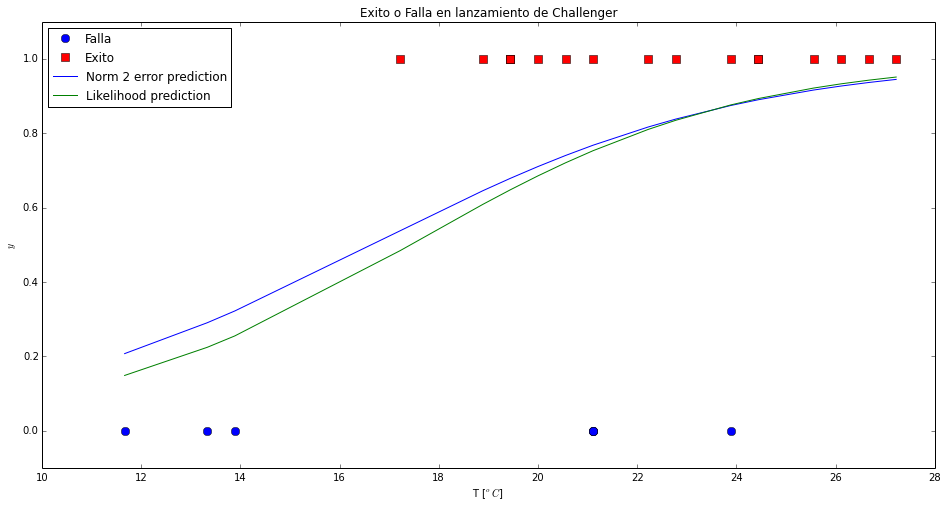

In [15]:
# Predictions
y_pred_J = sigmoid(np.dot(X, theta_J))
y_pred_l = sigmoid(np.dot(X, theta_l))
# Plot of data
plt.figure(figsize=(16,8))
plt.plot(x[y==0], y[y==0], 'bo', label="Falla", ms=8)
plt.plot(x[y>0], y[y>0], 'rs', label="Exito", ms=8)
plt.plot(x, y_pred_J, label="Norm 2 error prediction")
plt.plot(x, y_pred_l, label="Likelihood prediction")
plt.ylim([-0.1, 1.1])
plt.legend(loc=0, numpoints=1)
plt.title("Exito o Falla en lanzamiento de Challenger")
plt.xlabel(r"T [${}^o C$]")
plt.ylabel(r"$y$")
plt.show()

## 2. Aplicación al Iris Dataset

Hay
definidas $3$ clases, pero nosotros sólo podemos clasificar en $2$ clases. ¿Qué hacer?

In [20]:
import numpy as np
from sklearn import datasets

# Loading the data
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print iris.target_names

# Print data and labels
for x, y in zip(X,Y):
    print x, y

['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2] 0
[ 4.9  3.   1.4  0.2] 0
[ 4.7  3.2  1.3  0.2] 0
[ 4.6  3.1  1.5  0.2] 0
[ 5.   3.6  1.4  0.2] 0
[ 5.4  3.9  1.7  0.4] 0
[ 4.6  3.4  1.4  0.3] 0
[ 5.   3.4  1.5  0.2] 0
[ 4.4  2.9  1.4  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 5.4  3.7  1.5  0.2] 0
[ 4.8  3.4  1.6  0.2] 0
[ 4.8  3.   1.4  0.1] 0
[ 4.3  3.   1.1  0.1] 0
[ 5.8  4.   1.2  0.2] 0
[ 5.7  4.4  1.5  0.4] 0
[ 5.4  3.9  1.3  0.4] 0
[ 5.1  3.5  1.4  0.3] 0
[ 5.7  3.8  1.7  0.3] 0
[ 5.1  3.8  1.5  0.3] 0
[ 5.4  3.4  1.7  0.2] 0
[ 5.1  3.7  1.5  0.4] 0
[ 4.6  3.6  1.   0.2] 0
[ 5.1  3.3  1.7  0.5] 0
[ 4.8  3.4  1.9  0.2] 0
[ 5.   3.   1.6  0.2] 0
[ 5.   3.4  1.6  0.4] 0
[ 5.2  3.5  1.5  0.2] 0
[ 5.2  3.4  1.4  0.2] 0
[ 4.7  3.2  1.6  0.2] 0
[ 4.8  3.1  1.6  0.2] 0
[ 5.4  3.4  1.5  0.4] 0
[ 5.2  4.1  1.5  0.1] 0
[ 5.5  4.2  1.4  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 5.   3.2  1.2  0.2] 0
[ 5.5  3.5  1.3  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 4.4  3.   1.3  0.2] 0
[ 5.1  3.4  1.5  0.2] 0
[ 5.

## 2. Aplicación al Iris Dataset

Podemos ***definir*** 2 clases: Iris Setosa y no Iris Setosa.
¿Que label le pondremos a cada clase?

In [21]:
import numpy as np
from sklearn import datasets

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
print names
X = iris.data
Y = np.array(iris.target==0, int)

# Print data and labels
for x, y in zip(X,Y):
    print x, y

['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2] 1
[ 4.9  3.   1.4  0.2] 1
[ 4.7  3.2  1.3  0.2] 1
[ 4.6  3.1  1.5  0.2] 1
[ 5.   3.6  1.4  0.2] 1
[ 5.4  3.9  1.7  0.4] 1
[ 4.6  3.4  1.4  0.3] 1
[ 5.   3.4  1.5  0.2] 1
[ 4.4  2.9  1.4  0.2] 1
[ 4.9  3.1  1.5  0.1] 1
[ 5.4  3.7  1.5  0.2] 1
[ 4.8  3.4  1.6  0.2] 1
[ 4.8  3.   1.4  0.1] 1
[ 4.3  3.   1.1  0.1] 1
[ 5.8  4.   1.2  0.2] 1
[ 5.7  4.4  1.5  0.4] 1
[ 5.4  3.9  1.3  0.4] 1
[ 5.1  3.5  1.4  0.3] 1
[ 5.7  3.8  1.7  0.3] 1
[ 5.1  3.8  1.5  0.3] 1
[ 5.4  3.4  1.7  0.2] 1
[ 5.1  3.7  1.5  0.4] 1
[ 4.6  3.6  1.   0.2] 1
[ 5.1  3.3  1.7  0.5] 1
[ 4.8  3.4  1.9  0.2] 1
[ 5.   3.   1.6  0.2] 1
[ 5.   3.4  1.6  0.4] 1
[ 5.2  3.5  1.5  0.2] 1
[ 5.2  3.4  1.4  0.2] 1
[ 4.7  3.2  1.6  0.2] 1
[ 4.8  3.1  1.6  0.2] 1
[ 5.4  3.4  1.5  0.4] 1
[ 5.2  4.1  1.5  0.1] 1
[ 5.5  4.2  1.4  0.2] 1
[ 4.9  3.1  1.5  0.1] 1
[ 5.   3.2  1.2  0.2] 1
[ 5.5  3.5  1.3  0.2] 1
[ 4.9  3.1  1.5  0.1] 1
[ 4.4  3.   1.3  0.2] 1
[ 5.1  3.4  1.5  0.2] 1
[ 5.

## 2.  Aplicación al Iris Dataset

Para aplicar el algoritmo, utilizando el algoritmo [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) de la librería sklearn, requerimos un código como el siguiente:

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Loading the data
iris = datasets.load_iris()
names = iris.target_names
X = iris.data
Y = np.array(iris.target==0, int)

# Fitting the model
Logit = LogisticRegression()
Logit.fit(X,Y)

# Obtain the coefficients
print Logit.intercept_, Logit.coef_ 

# Predicting values
Y_pred = Logit.predict(X)
#x = X.mean(axis=0)
#Y_pred_mean = Logit.predict(x)
#print x, Y_pred_mean

[ 0.26560617] [[ 0.41498833  1.46129739 -2.26214118 -1.0290951 ]]


## 2.  Aplicación al Iris Dataset

Podemos visualizar el resultado con una matriz de confusión.

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, Y_pred)

print cm

[[100   0]
 [  0  50]]


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


¡Nuestra clasificación es perfecta!

## Referencias

* Jake VanderPlas, ESAC Data Analysis and Statistics Workshop 2014, https://github.com/jakevdp/ESAC-stats-2014
* Andrew Ng, Machine Learning CS144, Stanford University.